Benchmarks
==========
Replications of published work using **ionize** to verify results.

In [1]:
from __future__ import print_function, absolute_import, division
import ionize
db = ionize.Database()
import numpy as np
from matplotlib import pyplot as plot
%matplotlib inline
np.set_printoptions(precision=3)
import itertools

## Basic principles of electrolyte chemistry for microfluidic electrokinetics. Part I: Acid–base equilibria and pH buffers
Persat,  2009


/Users/lewis/Documents/github/ionize/ionize/Solution/equilibrium.py:143: UserWarning: Ionic strength > 1M. Ionic stregth correction may be inaccurate.
  warnings.warn(('Ionic strength > 1M. '


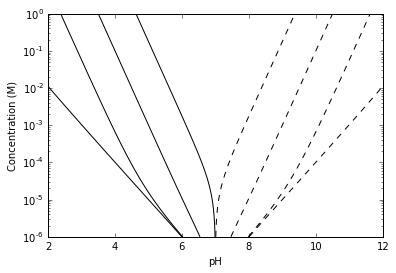

In [2]:
pKa = [4.75, 7, 9.25]
c = np.logspace(-6, 0)

for valence, extra_pKa, style in [(-1, -2, 'k'), (1, 16, '--k')]:
    for k in pKa + [extra_pKa]:
        ion = ionize.Ion('dummy', [valence], [k], [valence])
        pH = [ionize.Solution(ion, cp).pH for cp in c]
        plot.semilogy(pH, c, style)
        
plot.xlim(2, 12)
plot.xlabel('pH')
plot.ylabel('Concentration (M)')
plot.show()

**Fig 1** Flood’s diagram for strong and weak acids (solid lines), and strong and weak bases (dashed lines) in solution. The left half of the diagram corresponds to the logarithm of total concentration of a single acid as a function of pH. The pH of weak acids deviates from the strong acid relation pH 1⁄4  log10cA. pH always decreases with addition of weak acid, but more and more weakly as their pKaincreases. Similarly, weak bases deviate from the effect of strong base on pH (pH 1⁄4 14 + log10cB). For the same base concentration, the pH of a stronger base (higher pKa) is higher than for a weak base.

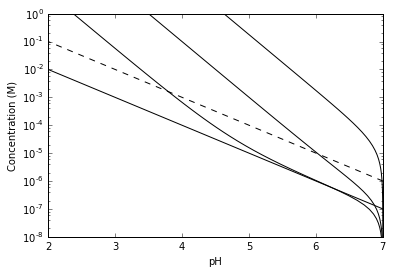

In [3]:
pKa = [4.75, 7, 9.25]
c = np.logspace(-8, 0)
valence = -1

for k in pKa:
        ion = ionize.Ion('dummy', [valence], [k], [valence])
        pH = [ionize.Solution(ion, cp).pH for cp in c]
        plot.semilogy(pH, c, 'k')

plot.semilogy(-np.log10(c), c, 'k')
plot.semilogy(-np.log10(c), 10*c, '--k')
# plot.Rectangle((0, 1e-3), 3, 100, color='b') # fix area plot
plot.xlim(2, 7)
plot.ylim(1e-8, 1)
plot.xlabel('pH')
plot.ylabel('Concentration (M)')
plot.show()

**Fig 2** The concentration of the conjugate base of three weak acids as a function of pH illustrates the moderate pH approximation in acidic conditions. The lines labelled log10cH and 1 + log10cH represent the 1  and 10  concentration of hydronium ions, respectively. The moderate pH zone is the width of the grey area. In this zone, buffer ion concen- trations of about 1 mM and higher (height of grey zone) ensure cA, 1 $ 10 cH. Note that in the case of a strong acid (resp. base) alone in solution, the moderate pH approximation cannot hold as cA, 1 1⁄4 cH (resp. cB,+1 1⁄4 cOH for a strong base).

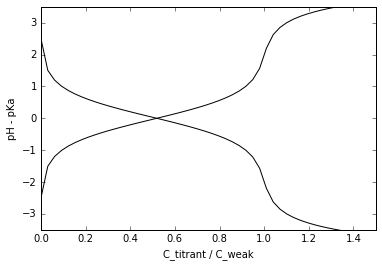

In [4]:
ratio = np.linspace(0, 1.5)
pKa = 7
conc = 0.01

weak_acid = ionize.Ion('weak acid', [-1], [pKa], [-1])
weak_base = ionize.Ion('weak base', [1], [pKa], [1])
strong_acid = ionize.Ion('strong acid', [-1], [3], [-1])
strong_base = ionize.Ion('strong base', [1], [11], [1])

for weak_ion, strong_ion in ((weak_acid, strong_base), 
                             (weak_base, strong_acid)):
    pH = [ionize.Solution([weak_ion, strong_ion], 
                           [conc, r*conc]).pH for r in ratio]
    pH = np.array(pH)
    plot.plot(ratio, pH - pKa, 'k')
    
plot.xlim(0, 1.5)
plot.ylim(-3.5, 3.5)
plot.xlabel('C_titrant / C_weak')
plot.ylabel('pH - pKa')
plot.show()

**Fig 3** Titration of a weak acid (or base) by strong base (or acid). The difference between the buffer’s pH and the weak electrolyte’s pKa (pKweak) is plotted as a function of the concentration ratio of strong electrolyte (titrant) to weak electrolyte ctitrant/cweak. The solid portion of the curves assume moderate pH. The buffer’s sensitivity to titrant is lowest when ctitrant/cweak 1⁄4 0.5, at which point pH 1⁄4 pKweak, also called the half titration point. Buffer pH is most sensitive to addition of titrant when ctitrant z cweak or when ctitrant z 0. In these regions (marked by dashed lines), the moderate pH assumption breaks down, and the exact shape of the curve will depend strongly on the species’ pKa and the weak acid’s concentration. The inflection point which occurs at ctitrant 1⁄4 cweak (marked by ‘x’) is known as the equivalence point.

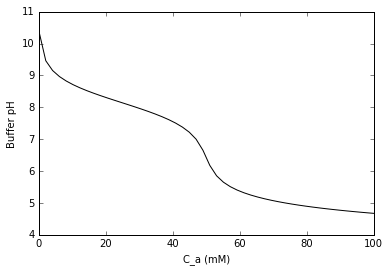

In [5]:
tris = db['tris']
acetic = db['acetic acid']
conc = np.linspace(0, .1)
pH = [ionize.Solution([tris, acetic], [.05, c]).pH for c in conc]
plot.plot(conc*1000, pH, 'k')
plot.xlabel('C_a (mM)')
plot.ylabel('Buffer pH')
plot.show()

**Fig 4** Titration of 50 mM Tris with up to 100 mM acetic acid (acetic acid denoted as ‘‘a’’). We here use concentration values which describe the total (analytical) concentration of acetic acid in solution. This is unlike the typical approach of plotting titration curves with respect to added volume (or number of moles) of titrant, but has the advantage of making the curve universal for all added volumes. At ca 1⁄4 0, the pH is elevated so that the concentration of Tris+ ions is approximately equal to that of OH  (and ‘‘moderate pH’’ assumption is violated). The buffer pH is dominated by the pKa of Tris ( 8.1) at low ( 25 mM) acetic acid concentrations, and by the pKa of acetic acid ( 4.8) at high ( 75 to 100 mM) acetic acid concentrations. The optimal buffer regions (i.e., the lowest slopes in the curve) occur, as expected, near pH 1⁄4 4.8 and 8.1. The inset shows the overprediction of eqn (28) due to its moderate pH assumption. Note that the error, while substantial at low titrant concentrations (over 1 pH unit for 10 mM acetic acid), is negligible even for 1 mM acetic acid.

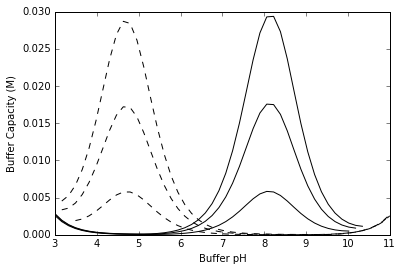

In [6]:
tris = db['tris']
acetic = db['acetic acid']
strong_acid = ionize.Ion('strong acid', [-1], [-2], [-1])
strong_base = ionize.Ion('strong base', [1], [16], [1])
pH = np.linspace(3, 11)
conc = [.01, .03, .05]

for buff, titrant, style in [(tris, strong_acid, 'k'), 
                             (acetic, strong_base, '--k')]:
    for c in conc:
        cap = []
        for p in pH:
            try:
                sol = ionize.Solution(buff, c).titrate(titrant, p)
                cap.append(sol.buffering_capacity())
            except:
                cap.append(None)
        plot.plot(pH, cap, style)
plot.xlabel('Buffer pH')
plot.ylabel('Buffer Capacity (M)')
plot.show()


**Fig 5** Buffering capacity for a weak acid buffer (acetic acid, pKa 1⁄4 4.75, dashed lines) and a weak base buffer (Tris, pKa 1⁄4 8.1, solid lines), at
several concentrations. As evident from equations (32) and (33), buffers
are most effective at high concentrations and near their pK ’s. At both a
high pH (pH > 10) and low pH (pH < 4) the self-ionization of water provides an additional buffering effect.

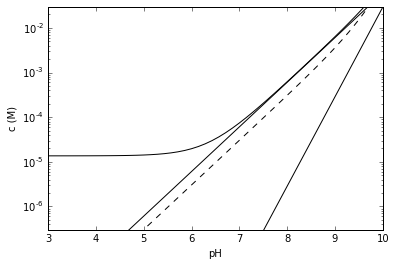

In [7]:
H = ionize.Aqueous.henry_CO2(25)
c = .0004 * H
pH = np.linspace(3, 10)
CO2 = db['carbonic acid']

CT = []
C1 = []
C2 = []
I = []
for p in pH:
    f1, f2 = CO2.ionization_fraction(p)
    f0 = 1 - f1 - f2
    CT.append(c / f0)
    C1.append(CT[-1] * f1)
    C2.append(CT[-1] * f2)
    I.append(CT[-1] * CO2.charge(p, moment=2) / 2)

plot.semilogy(pH, CT, 'k')
plot.semilogy(pH, C1, 'k')
plot.semilogy(pH, C2, 'k')
plot.semilogy(pH, I, '--k')

plot.xlabel('pH')
plot.ylabel('c (M)')
plot.ylim(3e-7, 3e-2)
plot.show()

**Fig 6** Carbonic acid concentration and its coupling with pH. At pH < 5, most of the dissolved carbon dioxide remains protonated, in neutral form
and asymptotes to the value determined by its Henry’s constant. In this
regime, the contribution of carbon dioxide and related species to ionic
strength, ICO2, is less than 1 mM. For pH > 5.5, cHCO3  is non-negligible
and the equilibrium total concentration of carbonate species in solution
cCO T dramatically increases. cHCO   is the primary contribution to ICO , 232
which reaches 3.6 mM at pH 1⁄4 9.0. For pH > 9.5, cCO32  is significant. At high pH, cCO 2  has a dramatic effect on ionic strength. Theoretically, the
3
ionic strength contribution from CO2 reaches 87 mM at pH 1⁄4 10.

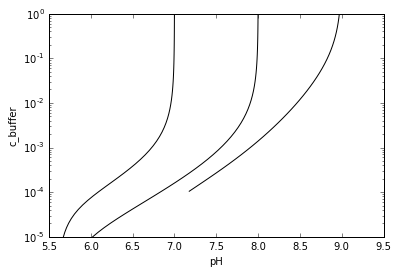

In [8]:
c = np.logspace(-5, 0)
pH = [7, 8, 9]

for p in pH:
    adj = []
    for cp in c:
        try:
            pa = ionize.Solution('tris', cp
                           ).titrate('chloride', p
                                    ).equilibrate_CO2().pH
            adj.append(pa)
        except:
            adj.append(None)
    plot.semilogy(adj, c, 'k')
    
plot.xlabel("pH")
plot.ylabel('c_buffer')
plot.xlim(5.5, 9.5)
plot.ylim(1e-5, 1)
plot.show()  

**Fig 7** Flood’s diagram for three different Tris hydrochloride (pKa 1⁄4 8.2at 20  C) buffers under the influence of dissolved CO2 and carbonate species. The dashed vertical lines correspond to three idealized cases where the atmospheric carbon dioxide concentration is neglected, and moderate pH. The solid curves correspond to a realistic buffer subject to atmospheric effects. The curve labels indicate the pH value in idealized conditions (free of CO2). The middle curve (labelled pKa) corresponds to a buffer prepared with cbuffer of Tris and 0.5 cbuffer of HCl, so that, ideally, pH 1⁄4 pKa 1⁄4 8.2 (from Henderson–Hasselbalch equation (21)). For cbuffer > 100 mM, the buffer pH has values reasonably close to those predicted by neglecting CO2. However, we see strong deviation from ideal pH for buffer concentrations smaller than 10 mM. For example, a 1 mM Tris, 0.5 mM HCl solution has an actual pH about 7.7; while a 0.1 mM, Tris 0.05 mM HCl solution has an actual pH of about 6.9 (vs. 8.2). The left- (labelled pKa   1) and right-hand (labelled pKa + 1) curves correspond to buffers prepared with cbuffer of Tris and respectively 0.91 cbuffer and 11 cbuffer of HCl; and so, in the absence of CO2, would yield respectively pH1⁄4pKa  11⁄47.2andpH1⁄4pKa +11⁄49.2.

## Basic principles of electrolyte chemistry for microfluidic electrokinetics. Part II: Coupling between ion mobility, electrolysis, and acid–base equilibria
Persat,  2009

/Users/lewis/Documents/github/ionize/ionize/Ion/mobility.py:43: UserWarning: Insufficient information for Onsager-Fuoss correction to mobility. Returning the Robinson-Stokes approximation.
  warnings.warn("Insufficient information for Onsager-Fuoss "


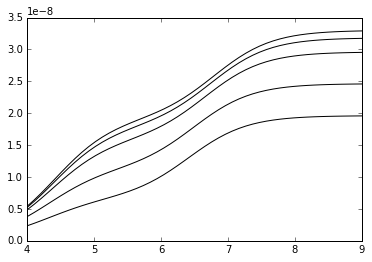

In [9]:
fl = db['fluorescein']
pH = np.linspace(4, 9)
I = [0, 1e-3, 1e-2, 1e-1, .5]

for Ip in I:
    mob = np.array([fl.mobility(pp, Ip) 
                    for pp in pH])
    plot.plot(pH, -mob, 'k')
    
plot.show()

**Fig 1** Ionic strength and pH effects on electrophoretic mobility of fluorescein. We use the Pitts equation (equation (12)) and Davies equa- tions (eq. (40) of Part I of this two-paper series) to correct electrophoretic mobility and pKa for ionic strength effects, respectively. We plot the absolute value of fluorescein mobility (all values are actually negative). The values of concentrations correspond to ionic strength of the solution, and the concentration of fluorescein is small compared to ionic strength. We used sodium as counterion. The dissociation coefficients of fluores- cein yield the strongest influence of pH on mobility according to equa- tions (6). The shaded zone corresponds to pH values where fluorescein fluorescence is below 10% its maximum value.25,26 We used pK 1 1⁄4 4.45, pK 2 1⁄4 6.8,26 and m 2 1⁄4  39.5   10 9 m2 V 1 s 1and m 1 1⁄4  25   10 9 m2 V 1 s 1,23,24 and a 1⁄4 4 A ̊ . In the electrophoretic mobility calculations, we neglected the effect of the cationic form of fluorescein (pK1 1⁄4 2.1).

**Fig 3** Effect of electrode reaction on anode pH and cathode pH for Tris and acetate buffers titrated with respectively hydrochloric acid and sodium hydroxide. (a) and (b): pH variation for 10 mM Tris initially titrated with hydrochloric acid to pH0, which is varied from pKa   1 to pKa + 1. We consider 2.5 kV applied to a 5 cm long, 50 mm wide (20 mm deep) channel. (a) pH at the 100 ml anode reservoir. If initial pH is below pKa, the anode pH drops dramatically, as the anode generates H+. (b) pH at the 100 mL cathode reservoir. The pH change is slow as the cathode reservoir fills with weak base. Inset: anode (black solid lines) and cathode (grey solid lines) pH for 10 mL, 25 mL and 100 mL reservoirs and pH0 1⁄4 pKa. (c) and (d): pH variation for 10 mM acetate buffer (titrated with sodium hydroxide) in otherwise the same conditions as the previous case. (c) pH at the 100 mL anode reservoir. The pH change is slow as the anode reservoir fills with weak acid. Inset: anode (black solid lines) and cathode (grey solid lines) pH for 10 mL, 25 mL and 100 mL reservoirs and pH0 1⁄4 pKa. (d) pH at the 100 mL cathode reservoir. If initial pH is above pKa, the cathode pH increase dramatically, as the cathode generates OH .

### Ionic strength effects on electrophoretic focusing and separations
Bahga 2009

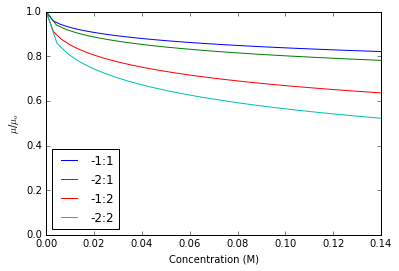

In [10]:
concentrations = np.linspace(0, 0.14)
ref_mob = 50.e-9
z = [1, 2]
for zp, zm in itertools.product(z, repeat=2):
    positive_ion = ionize.Ion('positive', [zp], [14], [ref_mob])
    negative_ion = ionize.Ion('negative', [-zm], [0], [-ref_mob])
    mob = []
    i = []
    for c in concentrations:
        sol = ionize.Solution([positive_ion, negative_ion], [c/zp, c/zm])
        mob.append(sol.ions[0].actual_mobility() / ref_mob )
        i.append(sol.ionic_strength)
    plot.plot(i, mob, label='-{}:{}'.format(zm, zp))
plot.ylim(0, 1)
plot.xlim(0, .14)
plot.legend(loc='lower left')
plot.xlabel('Concentration (M)')
plot.ylabel('$\mu$/$\mu_o$')
plot.show()

**Fig 1**  Mobility dependence of several binary electrolytes on ionic strength. Plot shows ionic mobility of a cation for binary electrolytes with various anion:cation valence values. (a) Varia- tion of electrophoretic mobility of cations with ionic strength using Onsager–Fuoss model with finite ionic radius, Eq. (3). Univalent cations have lesser reduction in mobility than divalent ions for increasing ionic strength. Thus, cations in  1:1 and  2:1 electrolytes have lesser mobility, respectively, than cations in  1:2 and  2:2 electrolytes. In addition, greater charge on counter-ions (anions) causes greater reduction in mobility. Thus, cations in  2:1 and  1:2 electrolytes have lesser mobility, respectively, than cations in  1:1 and –2:2 electrolytes. (b) The effect of finite radius correction to Onsager–Fuoss model. Dotted line corresponds to Onsager–Fuoss model assuming ions as point charges, Eq. (2), and solid line corresponds to Onsager–- Fuoss model using finite ionic radius, Eq. (3). Neglecting ionic radius overpredicts the reduction in mobility at finite ionic strengths. For these sample calculations, the mobilities of all ions is taken as m0 1⁄4 50   10 9 m2/V/s.

/Users/lewis/Documents/github/ionize/ionize/Ion/mobility.py:43: UserWarning: Insufficient information for Onsager-Fuoss correction to mobility. Returning the Robinson-Stokes approximation.
  warnings.warn("Insufficient information for Onsager-Fuoss "


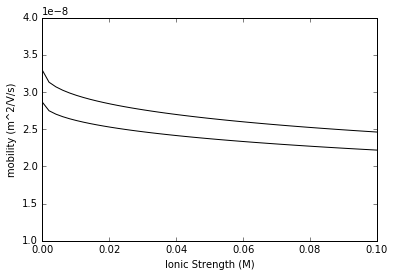

In [11]:
fl = db['fluorescein']
I = np.linspace(0, .1)
pH = [9.35, 7.15]

for p in pH:
    mob = np.array([fl.mobility(p, Ip) for Ip in I])
    plot.plot(I, -mob, 'k')

plot.xlim(0, .1)
plot.ylim(1e-8, 4e-8)
plot.xlabel('Ionic Strength (M)')
plot.ylabel('mobility (m^2/V/s)')
plot.show()

**Fig 2** Effect of ionic strength on ionic mobility of Fluorescein at two pH values. Data show the experimentally measured ionic mobility of fluorescein. Squares and triangles correspond to measurements obtained at pH 7.15 and 9.35, respectively. Measurements were made by CZE, using glycine-sodium hydroxide buffer at pH 9.35 and HEPES-sodium hydroxide buffer for pH 7.15. Plotted uncertainty bars correspond to 95% confidence in mean values, calculated using Student’s t-test distribution. The trends provided by numerical calculations (lines) agree fairly well with other experimental observations (see the Supporting Information). Calculations were obtained using m0 1 1⁄4  19   10 9 m2/V/s, pKa 1 1⁄4 4:4 and m0 2 1⁄4  36   10 9 m2/V/s, pKa 1 1⁄4 6:8.

Ion(name='adp', reference_mobility=[-5.3700000000000004e-08, -3.6700000000000004e-08, -1.92e-08], nightingale_data=None, alias=('adp',), valence=[-3, -2, -1], reference_pKa=[7.056, 4.101, 0.0], molecular_weight=427.20099999999996, enthalpy=[-5439.0, 17154.0, 0.0], reference_temperature=25.0, heat_capacity=None)
[  7.055e+00   4.100e+00  -3.230e-04]
Solution(pH=1.39, I=0.0487 M)
[ 13.7]


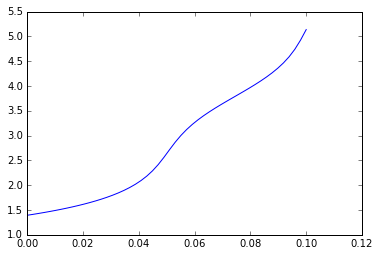

In [46]:
analyte = db['alexa fluor 488']
weak = db['histidine']
print(repr(weak))
print(weak.pKa())
LE = ionize.Solution('adenosine diphosphate', .05)
print(LE)
LE.pH

cl = db['chloride']
print(cl.pKa())
c = np.linspace(0, 0.1)
pH = np.array([(LE + (cl, cp)).pH for cp in c])
plot.plot(c, pH)
plot.show()

**Fig 3** Influence of ionic strength dependence on a divalent analyte focusing in peak mode ITP (with univalent TE). (a) Experimental validation of the ionic strength dependence model showing the moles of accumulated sample at an LE-TE interface versus the conductivity of the LE. Circles show experimental data [19], while the solid line shows numerical which take into account the effect of ionic strength. The dotted line shows predicted sample accumulation when ionic strength effects are neglected. Inset (b) shows a comparison with the same data but now versus LE concentration. This highlights the discrepancy in simulated sample accumulation predicted with (solid line) and without (dotted line) ionic strength correction. The analyte is 10 nM AF initially mixed with the TE. LE is histidine-HCl (500 mM stock solution, pH 5 4.3) and TE is 3-phenylpropionic acid (50mM stock solution titarted with NaOH to pH54.9). All of the computational results shown use identical conditions.